In [ ]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PublicDataReader import TransactionPrice

service_key = os.getenv("PUBLIC_DATA_HUB")


In [ ]:
def get_sido_info():
    down_url = 'https://new.land.naver.com/api/regions/list?cortarNo=0000000000'
    r = requests.get(down_url,data={"sameAddressGroup":"false"},headers={
        "Accept-Encoding": "gzip",
        "Host": "new.land.naver.com",
        "Referer": "https://new.land.naver.com/complexes/102378?ms=37.5018495,127.0438028,16&a=APT&b=A1&e=RETAIL",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
    })
    r.encoding = "utf-8-sig"
    temp=json.loads(r.text)
    try:
        temp=pd.DataFrame(temp['regionList'])[["cortarNo", "cortarName"]]
    except:
        temp=[]
    return temp

def get_gungu_info(sido_code):
    down_url = 'https://new.land.naver.com/api/regions/list?cortarNo='+sido_code
    r = requests.get(down_url,data={"sameAddressGroup":"false"},headers={
        "Accept-Encoding": "gzip",
        "Host": "new.land.naver.com",
        "Referer": "https://new.land.naver.com/complexes/102378?ms=37.5018495,127.0438028,16&a=APT&b=A1&e=RETAIL",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
    })
    r.encoding = "utf-8-sig"
    temp=json.loads(r.text)
    try:
        temp=pd.DataFrame(temp['regionList'])[["cortarNo", "cortarName"]]
    except:
        temp=[]
    return temp

def get_dong_info(gungu_code):
    down_url = 'https://new.land.naver.com/api/regions/list?cortarNo='+gungu_code
    r = requests.get(down_url,data={"sameAddressGroup":"false"},headers={
        "Accept-Encoding": "gzip",
        "Host": "new.land.naver.com",
        "Referer": "https://new.land.naver.com/complexes/102378?ms=37.5018495,127.0438028,16&a=APT&b=A1&e=RETAIL",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
    })
    r.encoding = "utf-8-sig"
    temp=json.loads(r.text)
    try:
        temp=pd.DataFrame(temp['regionList'])[["cortarNo", "cortarName"]]
    except:
        temp=[]
    return temp

def get_apt_list(dong_code):
    down_url = 'https://new.land.naver.com/api/regions/complexes?cortarNo='+dong_code+'&realEstateType=APT&order='
    r = requests.get(down_url,data={"sameAddressGroup":"false"},headers={
        "Accept-Encoding": "gzip",
        "Host": "new.land.naver.com",
        "Referer": "https://new.land.naver.com/complexes/102378?ms=37.5018495,127.0438028,16&a=APT&b=A1&e=RETAIL",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
    })

    r.encoding = "utf-8-sig"
    temp=json.loads(r.text)
    try:
        temp=pd.DataFrame(temp['complexList'])[['complexNo', 'complexName']]
    except:
        temp=[]
    return temp



def get_apt_info(apt_code):
    down_url = 'https://new.land.naver.com/api/complexes/overview/'+apt_code
    r = requests.get(down_url,data={"sameAddressGroup":"false"},headers={
        "Accept-Encoding": "gzip",
        "Host": "new.land.naver.com",
        "Referer": "https://new.land.naver.com/complexes/"+apt_code+"?ms=37.482968,127.0634,16&a=APT&b=A1&e=RETAIL",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
    })
    r.encoding = "utf-8-sig"
    temp=json.loads(r.text)
    return temp


if __name__=="__main__":
    sido_list=get_sido_info() 
    gungu_list=get_gungu_info(sido_list['cortarNo'][0])
    dong_list=get_dong_info(gungu_list['cortarNo'][0])
    apt_list = get_apt_list(dong_list['cortarNo'][0])
    apt_info = get_apt_info(apt_list['complexNo'][0])

    print(sido_list)
    print(gungu_list)
    print(dong_list)
    print(apt_list)
    for dict_key, dict_item in apt_info.items():
        print('key', dict_key, 'item', dict_item)




In [ ]:
for i in gungu_list['cortarNo']:
    seoul_volume = []
    api = TransactionPrice(service_key)

    # 기간 내 조회

    df = api.get_data(
        property_type="아파트",
        trade_type="매매",
        sigungu_code=i,
        start_year_month="202401",
        end_year_month="202506",
    )

    
    seoul_volume.append(
        {
            'cortarNo': i,
            'cortarName': gungu_list['cortarName'][i],
            'volume': df.shape[0]
        }
    )



In [ ]:
# 타임아웃 에러 해결을 위한 개선된 코드
import time
from requests.exceptions import ConnectTimeout, ReadTimeout, RequestException

seoul_volume = []
api = TransactionPrice(service_key)

print(f"총 {len(gungu_list)} 개 구에 대해 데이터 조회 시작...")


for idx, row in gungu_list.iterrows():
    cortarNo = str(row['cortarNo'])[:5]  # 앞의 5자리만 추출
    cortarName = row['cortarName']
    
    print(f"\n{idx+1}/{len(gungu_list)} - {cortarName} ({cortarNo}) 조회 중...")
    
    # 여러 번 시도하는 로직
    max_retries = 3
    retry_count = 0
    success = False
    
    while retry_count < max_retries and not success:
        try:
            # API 요청 간격 조정 (1초 대기)
            if idx > 0:  # 첫 번째가 아닌 경우만 대기
                time.sleep(1)
            
            # 데이터 조회
            df = api.get_data(
                property_type="아파트",
                trade_type="매매",
                sigungu_code=cortarNo,
                start_year_month="202401",
                end_year_month="202406",
            )
            
            # 성공적으로 조회된 경우
            volume = df.shape[0] if df is not None else 0
            seoul_volume.append({
                'cortarNo': cortarNo,
                'cortarName': cortarName,
                'volume': volume
            })
            
            print(f"  ✅ 성공: {volume}건")
            success = True
            
        except (ConnectTimeout, ReadTimeout, RequestException) as e:
            retry_count += 1
            print(f"  ❌ 시도 {retry_count}/{max_retries} 실패: {type(e).__name__}")
            
            if retry_count < max_retries:
                print(f"  🔄 {retry_count * 2}초 후 재시도...")
                time.sleep(retry_count * 2)  # 재시도 간격 점진적 증가
            else:
                print(f"  ⛔ 최대 시도 횟수 초과, 건너뛰기")
                seoul_volume.append({
                    'cortarNo': cortarNo,
                    'cortarName': cortarName,
                    'volume': 0  # 실패 시 0으로 설정
                })

print(f"\n완료! 총 {len(seoul_volume)} 개 구 데이터 수집")

# 결과 확인
volume_df = pd.DataFrame(seoul_volume)
print("\n수집 결과:")
print(volume_df)

총 25 개 구에 대해 데이터 조회 시작...

1/25 - 강남구 (11680) 조회 중...
  ✅ 성공: 6073건

2/25 - 강동구 (11740) 조회 중...
  ✅ 성공: 6338건

3/25 - 강북구 (11305) 조회 중...
  ✅ 성공: 1522건

4/25 - 강서구 (11500) 조회 중...
  ✅ 성공: 5038건

5/25 - 관악구 (11620) 조회 중...
  ✅ 성공: 2634건

6/25 - 광진구 (11215) 조회 중...
  ✅ 성공: 2546건

7/25 - 구로구 (11530) 조회 중...
  ✅ 성공: 4333건

8/25 - 금천구 (11545) 조회 중...
  ✅ 성공: 1201건

9/25 - 노원구 (11350) 조회 중...
  ✅ 성공: 7055건

10/25 - 도봉구 (11320) 조회 중...
  ✅ 성공: 2513건

11/25 - 동대문구 (11230) 조회 중...
  ✅ 성공: 4436건

12/25 - 동작구 (11590) 조회 중...
  ✅ 성공: 4873건

13/25 - 마포구 (11440) 조회 중...
  ✅ 성공: 5148건

14/25 - 서대문구 (11410) 조회 중...
  ✅ 성공: 3990건

15/25 - 서초구 (11650) 조회 중...
  ✅ 성공: 4784건

16/25 - 성동구 (11200) 조회 중...
  ✅ 성공: 5708건

17/25 - 성북구 (11290) 조회 중...
  ✅ 성공: 5164건

18/25 - 송파구 (11710) 조회 중...
  ✅ 성공: 7052건

19/25 - 양천구 (11470) 조회 중...
  ✅ 성공: 4585건

20/25 - 영등포구 (11560) 조회 중...
  ✅ 성공: 5507건

21/25 - 용산구 (11170) 조회 중...
  ✅ 성공: 1827건

22/25 - 은평구 (11380) 조회 중...
  ✅ 성공: 3403건

23/25 - 종로구 (11110) 조회 중...
  ✅ 성

In [42]:
print(volume_df["volume"].describe())
print("합계", volume_df["volume"].sum())

count      25.000000
mean     4023.720000
std      1861.810868
min       776.000000
25%      2546.000000
50%      4436.000000
75%      5164.000000
max      7055.000000
Name: volume, dtype: float64
합계 100593


In [46]:
# 기간 내 조회
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="11650",
    start_year_month="202201",
    end_year_month="202212",
)

df.tail()

,법정동시군구코드,법정동읍면동코드,법정동지번코드,법정동본번코드,법정동부번코드,도로명,도로명시군구코드,도로명코드,도로명일련번호코드,도로명지상지하코드,...,단지일련번호,해제여부,해제사유발생일,거래유형,중개사소재지,등기일자,아파트동명,매도자,매수자,토지임대부아파트여부
685,11650,10800,1,1445,0014,서초중앙로2길,11650,4163718,01,0,...,11650-3284,None,None,직거래,None,None,None,None,None,N
686,11650,10600,1,0157,0000,신반포로33길,11650,4163453,01,0,...,11650-102,None,None,중개거래,서울 서초구,None,None,None,None,N
687,11650,10800,1,1445,0004,서초중앙로,11650,3121024,03,0,...,11650-518,None,None,중개거래,서울 서초구,None,None,None,None,N
688,11650,10800,1,1445,0004,서초중앙로,11650,3121024,03,0,...,11650-518,O,22.12.09,중개거래,서울 서초구,None,None,None,None,N
689,11650,10800,1,1337,0003,효령로77길,11650,4163659,01,0,...,11650-4072,None,None,중개거래,서울 서초구,None,None,None,None,N


In [45]:
# 기간 내 조회
df = api.get_data(
    property_type="아파트",
    trade_type="전월세",
    sigungu_code="11650",
    start_year_month="202201",
    end_year_month="202212",
)

df.tail()

,법정동시군구코드,법정동,단지명,지번,전용면적,계약년도,계약월,계약일,보증금액,월세금액,층,건축년도,계약기간,계약구분,갱신요구권사용,종전계약보증금,종전계약월세
15144,11650,서초동,우성아파트,1326-17,59.93,2022,12,17,66150,0,8,1998,23.02~25.02,갱신,사용,63000,<NA>
15145,11650,서초동,신동아아파트(1차),1333,101.60,2022,12,3,3000,150,10,1978,23.01~25.01,신규,None,<NA>,<NA>
15146,11650,서초동,서초동대우디오빌프라임,1337-22,64.05,2022,12,16,60000,0,15,2005,23.02~25.02,갱신,None,57000,<NA>
15147,11650,서초동,래미안서초에스티지,1332-13,83.60,2022,12,3,121275,0,22,2016,22.12~24.12,갱신,None,120000,<NA>
15148,11650,서초동,래미안 리더스원,1755,114.94,2022,12,5,200000,0,21,2020,23.02~25.02,신규,None,<NA>,<NA>


In [55]:
# 정확한 갭투자 비중 계산 함수
def calculate_precise_gap_investment(sigungu_code, start_year_month, end_year_month, area_name=""):
    """
    정확한 갭투자 비중 계산
    1. 전월세에서 월세=0인 전세 데이터만 추출
    2. 매매와 전세에서 법정동, 아파트명, 층, 계약일이 같은 케이스 찾기
    3. 전체 매매 대비 비중 계산
    """
    print(f"=== {area_name} 정확한 갭투자 비중 분석 ===")
    
    # 1. 매매 데이터 수집
    print("1. 매매 데이터 수집 중...")
    df_trade = api.get_data(
        property_type="아파트",
        trade_type="매매",
        sigungu_code=sigungu_code,
        start_year_month=start_year_month,
        end_year_month=end_year_month,
    )
    
    # 2. 전월세 데이터 수집
    print("2. 전월세 데이터 수집 중...")
    df_rent = api.get_data(
        property_type="아파트",
        trade_type="전월세",
        sigungu_code=sigungu_code,
        start_year_month=start_year_month,
        end_year_month=end_year_month,
    )
    
    if df_trade is None or df_rent is None:
        print("❌ 데이터 수집 실패")
        return None
    
    print(f"매매 데이터: {len(df_trade)}건")
    print(f"전월세 데이터: {len(df_rent)}건")
    
    # 3. 전세 데이터만 추출 (월세 = 0)
    df_jeonse = df_rent[df_rent['월세금액'] == 0].copy()
    print(f"전세 데이터: {len(df_jeonse)}건")
    
    if len(df_jeonse) == 0:
        print("❌ 전세 데이터가 없습니다.")
        return None
    
    # 4. 매칭을 위한 키 생성
    def create_matching_key(df):
        df = df.copy()
        df['매칭키'] = (
            df['법정동'].astype(str) + "_" +
            df['단지명'].astype(str) + "_" +
            df['층'].astype(str) + "_" +
            df['계약년도'].astype(str) + "_" +
            df['계약월'].astype(str) + "_" +
            df['계약일'].astype(str)
        )
        return df
    
    df_trade_key = create_matching_key(df_trade)
    df_jeonse_key = create_matching_key(df_jeonse)
    
    # 5. 동일 조건 매칭 찾기
    matched_keys = set(df_trade_key['매칭키']) & set(df_jeonse_key['매칭키'])
    gap_investment_cases = len(matched_keys)
    total_trade_cases = len(df_trade)
    
    # 6. 갭투자 비중 계산
    gap_ratio = (gap_investment_cases / total_trade_cases * 100) if total_trade_cases > 0 else 0
    
    print(f"\n=== 분석 결과 ===")
    print(f"📊 전체 매매 거래량: {total_trade_cases:,}건")
    print(f"🏠 전세 거래량: {len(df_jeonse):,}건")
    print(f"🎯 동일 조건 매칭 케이스: {gap_investment_cases:,}건")
    print(f"💰 정확한 갭투자 비중: {gap_ratio:.2f}%")
    
    # 7. 매칭된 케이스 상세 정보
    if gap_investment_cases > 0:
        print(f"\n=== 갭투자 케이스 상세 (상위 10건) ===")
        
        gap_cases = []
        for key in list(matched_keys)[:10]:
            trade_case = df_trade_key[df_trade_key['매칭키'] == key].iloc[0]
            jeonse_case = df_jeonse_key[df_jeonse_key['매칭키'] == key].iloc[0]
            
            gap_cases.append({
                '법정동': trade_case['법정동'],
                '단지명': trade_case['단지명'],
                '층': trade_case['층'],
                '계약일': f"{trade_case['계약년도']}-{trade_case['계약월']:02d}-{trade_case['계약일']:02d}",
                '매매가격(만원)': f"{trade_case['거래금액']:,}",
                '전세보증금(만원)': f"{jeonse_case['보증금액']:,}",
                '전세가율(%)': f"{(jeonse_case['보증금액']/trade_case['거래금액']*100):.1f}"
            })
        
        gap_df = pd.DataFrame(gap_cases)
        display(gap_df)
    
    return {
        'area_name': area_name,
        'total_trade': total_trade_cases,
        'jeonse_count': len(df_jeonse),
        'gap_cases': gap_investment_cases,
        'gap_ratio': gap_ratio,
        'matched_keys': matched_keys
    }

# 서초구 분석 실행
result = calculate_precise_gap_investment("11680", "202201", "202212", "강남구")
result


=== 강남구 정확한 갭투자 비중 분석 ===
1. 매매 데이터 수집 중...
2. 전월세 데이터 수집 중...
매매 데이터: 879건
전월세 데이터: 22589건
전세 데이터: 11288건

=== 분석 결과 ===
📊 전체 매매 거래량: 879건
🏠 전세 거래량: 11,288건
🎯 동일 조건 매칭 케이스: 32건
💰 정확한 갭투자 비중: 3.64%

=== 갭투자 케이스 상세 (상위 10건) ===


,법정동,단지명,층,계약일,매매가격(만원),전세보증금(만원),전세가율(%)
0,도곡동,도곡현대힐스테이트105동,4,2022-03-30,"225,000","170,000",75.6
1,도곡동,도곡1차아이파크,8,2022-07-07,"290,000","170,000",58.6
2,일원동,래미안 개포 루체하임,15,2022-04-15,"280,000","160,000",57.1
3,수서동,까치마을,9,2022-02-15,"100,000","31,500",31.5
4,역삼동,역삼I'PARK,4,2022-01-21,"340,000","210,000",61.8
5,도곡동,타워팰리스1,31,2022-05-23,"337,000","157,500",46.7
6,자곡동,강남자곡 힐스테이트,9,2022-10-05,"126,685","78,612",62.1
7,도곡동,도곡쌍용예가,11,2022-03-08,"222,000","172,000",77.5
8,논현동,동현아파트1~6,11,2022-04-23,"290,000","130,000",44.8
9,논현동,신동아(22),6,2022-03-19,"180,000","80,000",44.4


{'area_name': '강남구',
 'total_trade': 879,
 'jeonse_count': 11288,
 'gap_cases': 32,
 'gap_ratio': 3.6405005688282137,
 'matched_keys': {'개포동_삼익대청아파트_12_2022_8_8',
  '개포동_성원대치2단지아파트_3_2022_11_15',
  '개포동_성원대치2단지아파트_7_2022_1_8',
  '개포동_성원대치2단지아파트_8_2022_4_7',
  '논현동_동양파라곤_4_2022_5_24',
  '논현동_동현아파트1~6_11_2022_4_23',
  '논현동_마일스디오빌_4_2022_1_26',
  '논현동_신동아(22)_6_2022_3_19',
  '대치동_대우아이빌멤버스(891-26)_7_2022_2_18',
  '대치동_은마_10_2022_11_5',
  '도곡동_도곡1차아이파크_8_2022_7_7',
  '도곡동_도곡쌍용예가_11_2022_3_8',
  '도곡동_도곡현대힐스테이트105동_4_2022_3_30',
  '도곡동_럭키(963)_2_2022_4_2',
  '도곡동_아카데미스위트1_15_2022_5_27',
  '도곡동_타워팰리스1_31_2022_5_23',
  '도곡동_타워팰리스1_47_2022_6_29',
  '도곡동_타워팰리스2_23_2022_5_24',
  '도곡동_타워팰리스3_52_2022_2_10',
  '도곡동_타워팰리스3_63_2022_3_30',
  '도곡동_포스코트_14_2022_6_14',
  '수서동_까치마을_9_2022_2_15',
  '역삼동_Bienestar_7_2022_5_24',
  '역삼동_갤러리아트_5_2022_1_3',
  "역삼동_역삼I'PARK_4_2022_1_21",
  '역삼동_역삼래미안_15_2022_4_23',
  '역삼동_역삼래미안_16_2022_3_26',
  '일원동_가람_4_2022_3_25',
  '일원동_래미안 개포 루체하임_15_2022_4_15',
  '일원동_우성7_6_2

In [63]:
# 간단한 월별 구별 갭투자 비율 계산 (단일 월 조회 사용)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import time
import platform

# 한글 폰트 설정 함수
def set_korean_font():
    system = platform.system()
    if system == 'Darwin':  # macOS
        # macOS에서 사용 가능한 한글 폰트들
        font_candidates = ['Apple SD Gothic Neo', 'AppleGothic', 'Helvetica']
        for font in font_candidates:
            try:
                plt.rcParams['font.family'] = font
                break
            except:
                continue
    elif system == 'Windows':
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux
        # 한글 폰트가 없는 경우 영문으로 표시
        plt.rcParams['font.family'] = 'DejaVu Sans'
    
    plt.rcParams['axes.unicode_minus'] = False

# 폰트 설정 적용
set_korean_font()

def calculate_gap_ratio(sale_df, jeonse_df):
    """간단한 갭투자 비율 계산"""
    if sale_df is None or jeonse_df is None or len(sale_df) == 0:
        return 0
    
    # 전세만 추출 (월세 = 0)
    jeonse_only = jeonse_df[jeonse_df['월세금액'] == 0].copy()
    
    if len(jeonse_only) == 0:
        return 0
    
    # 매칭키 생성
    def create_key(df):
        return (df['법정동'].astype(str) + "_" +
                df['단지명'].astype(str) + "_" +
                df['층'].astype(str) + "_" +
                df['계약년도'].astype(str) + "_" +
                df['계약월'].astype(str) + "_" +
                df['계약일'].astype(str))
    
    sale_keys = set(create_key(sale_df))
    jeonse_keys = set(create_key(jeonse_only))
    
    # 매칭 케이스 찾기
    matched_cases = len(sale_keys & jeonse_keys)
    
    # 갭투자 비율 계산
    gap_ratio = (matched_cases / len(sale_df)) * 100 if len(sale_df) > 0 else 0
    
    return gap_ratio

# 월별 구별 갭투자 비율 조회
months = ['202401', '202402', '202403', '202404', '202405', '202406']
results = []

print("📊 월별 구별 갭투자 비율 조회 시작...")
print("="*60)

for month in months:
    print(f"\n📅 {month} 분석 중...")
    
    for idx, row in gungu_list.iterrows():
        cortarNo = str(row['cortarNo'])[:5]  # 앞의 5자리만 추출
        cortarName = row['cortarName']
        
        try:
            # 매매 데이터 조회
            sale_df = api.get_data(
                property_type="아파트",
                trade_type="매매",
                sigungu_code=cortarNo,
                year_month=month,
            )
            
            # 전월세 데이터 조회
            jeonse_df = api.get_data(
                property_type="아파트",
                trade_type="전월세",
                sigungu_code=cortarNo,
                year_month=month,
            )
            
            # 갭투자 비율 계산
            gap_ratio = calculate_gap_ratio(sale_df, jeonse_df)
            
            # 결과 저장
            results.append({
                '년월': month,
                '구명': cortarName,
                '매매거래수': len(sale_df) if sale_df is not None else 0,
                '전월세거래수': len(jeonse_df) if jeonse_df is not None else 0,
                '갭투자비율(%)': round(gap_ratio, 2)
            })
            
            if gap_ratio > 0:
                print(f"  • {cortarName}: {gap_ratio:.1f}%")
            
            # API 호출 간격 조정
            time.sleep(0.1)
            
        except Exception as e:
            print(f"  ❌ {cortarName} 오류: {e}")
            results.append({
                '년월': month,
                '구명': cortarName,
                '매매거래수': 0,
                '전월세거래수': 0,
                '갭투자비율(%)': 0
            })

# 결과 데이터프레임 생성
gap_results_df = pd.DataFrame(results)

print(f"\n✅ 분석 완료! 총 {len(gap_results_df)} 개 데이터 수집")
print("\n📊 상위 10개 결과:")
print(gap_results_df.nlargest(10, '갭투자비율(%)')[['년월', '구명', '갭투자비율(%)', '매매거래수']])


📊 월별 구별 갭투자 비율 조회 시작...

📅 202401 분석 중...
  • 강남구: 1.5%
  • 강동구: 7.1%
  • 강서구: 2.9%
  • 관악구: 1.4%
  • 구로구: 0.7%
  • 금천구: 2.2%
  • 노원구: 4.1%
  • 도봉구: 4.1%
  • 동대문구: 1.9%
  • 동작구: 2.7%
  • 마포구: 2.4%
  • 서초구: 1.9%
  • 성동구: 4.1%
  • 성북구: 0.7%
  • 송파구: 7.2%
  • 양천구: 2.6%
  • 영등포구: 3.4%
  • 용산구: 2.1%
  • 은평구: 1.1%
  • 종로구: 5.0%
  • 중랑구: 1.2%

📅 202402 분석 중...
  • 강남구: 4.0%
  • 강동구: 1.8%
  • 강서구: 0.8%
  • 관악구: 1.2%
  • 광진구: 1.5%
  • 구로구: 1.7%
  • 노원구: 2.7%
  • 도봉구: 2.4%
  • 동대문구: 1.6%
  • 동작구: 3.7%
  • 마포구: 0.9%
  • 서대문구: 5.8%
  • 서초구: 0.9%
  • 성북구: 1.3%
  • 송파구: 6.5%
  • 양천구: 5.5%
  • 영등포구: 2.3%
  • 은평구: 0.9%
  • 종로구: 4.5%
  • 중구: 4.9%
  • 중랑구: 4.4%

📅 202403 분석 중...
  • 강남구: 1.7%
  • 강동구: 4.5%
  • 강북구: 1.2%
  • 강서구: 1.6%
  • 관악구: 3.9%
  • 광진구: 3.3%
  • 구로구: 0.9%
  • 금천구: 3.2%
  • 노원구: 2.0%
  • 도봉구: 0.8%
  • 동대문구: 4.0%
  • 동작구: 2.6%
  • 마포구: 2.7%
  • 서대문구: 2.1%
  • 서초구: 3.1%
  • 성동구: 3.4%
  • 성북구: 2.7%
  • 송파구: 2.7%
  • 영등포구: 3.0%
  • 용산구: 4.4%
  • 은평구: 2.5%
  • 종로구: 16.1%
  • 중구: 3.8%
  • 중

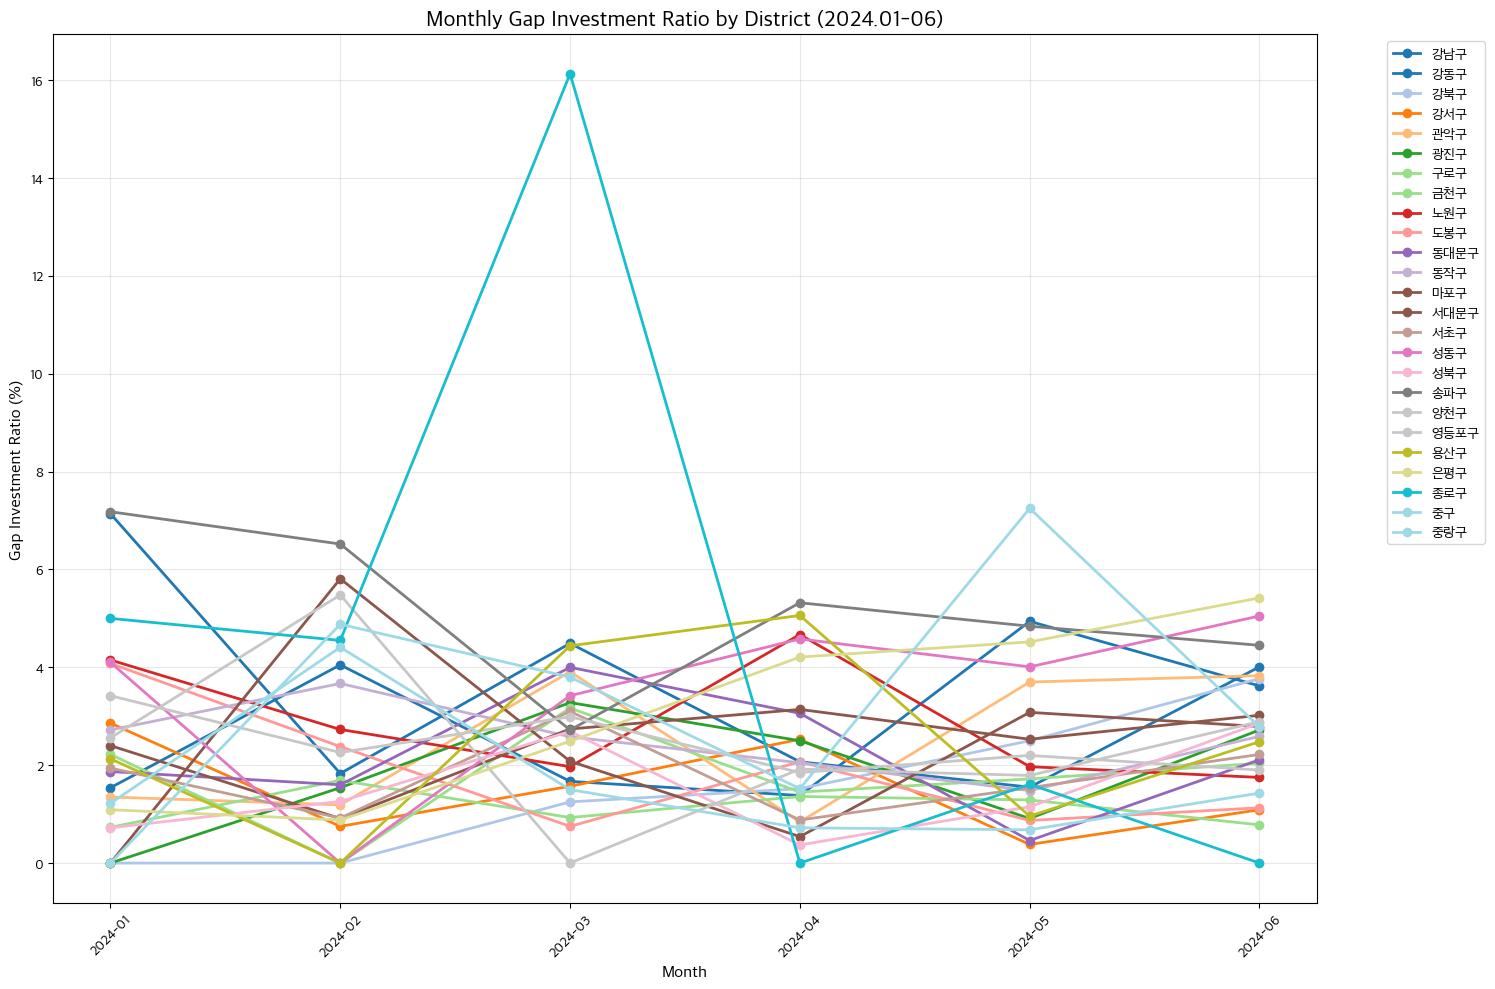

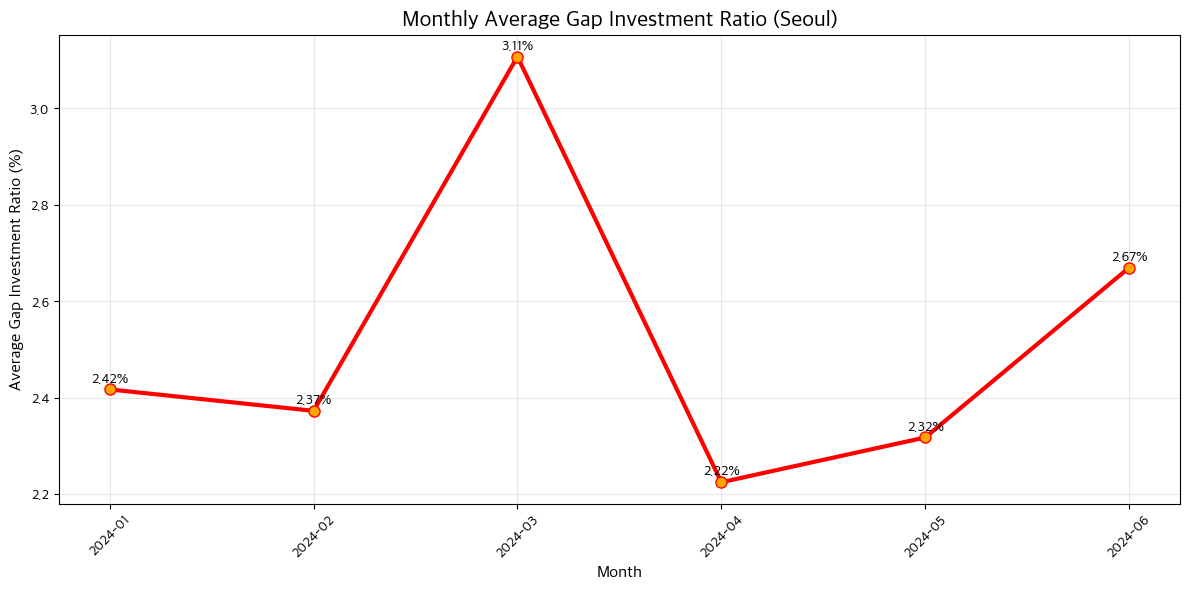

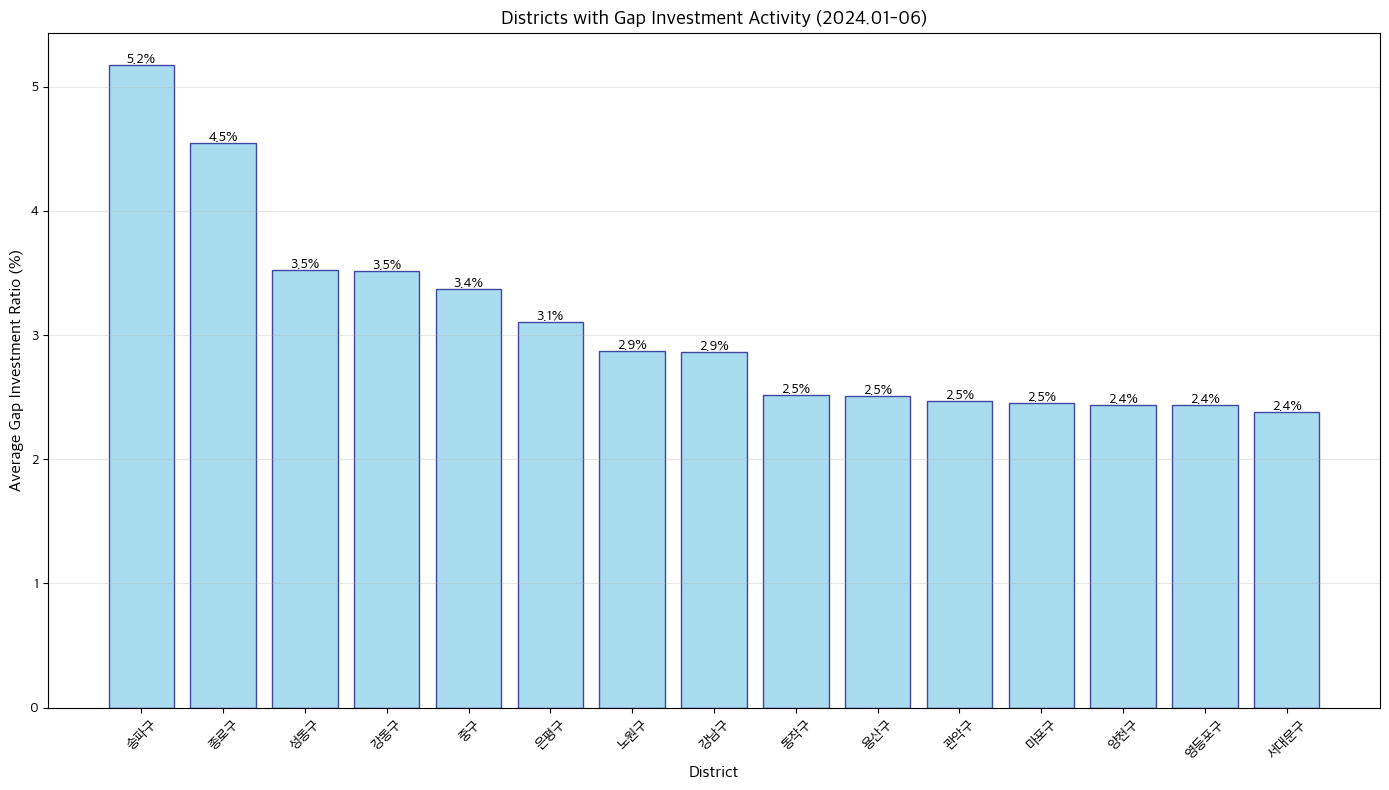


📊 월별 구별 갭투자 비율 분석 결과 요약
📈 전체 평균 갭투자 비율: 2.52%
📈 최대 갭투자 비율: 16.13%
📈 갭투자 비율 > 0인 케이스: 139/150 (92.7%)

🏆 갭투자가 발생한 구별 평균 비율:
   1. 송파구: 5.17%
   2. 종로구: 4.55%
   3. 성동구: 3.53%
   4. 강동구: 3.52%
   5. 중구: 3.37%
   6. 은평구: 3.10%
   7. 노원구: 2.87%
   8. 강남구: 2.87%
   9. 동작구: 2.52%
   10. 용산구: 2.51%
   11. 관악구: 2.47%
   12. 마포구: 2.46%
   13. 양천구: 2.44%
   14. 영등포구: 2.44%
   15. 서대문구: 2.38%
   16. 동대문구: 2.18%
   17. 도봉구: 1.88%
   18. 광진구: 1.82%
   19. 서초구: 1.77%
   20. 금천구: 1.77%
   21. 중랑구: 1.66%
   22. 강서구: 1.53%
   23. 성북구: 1.51%
   24. 강북구: 1.51%
   25. 구로구: 1.13%

📅 월별 평균 갭투자 비율:
   • 2024-01: 2.42%
   • 2024-02: 2.37%
   • 2024-03: 3.11%
   • 2024-04: 2.22%
   • 2024-05: 2.32%
   • 2024-06: 2.67%

💾 결과 저장: gap_investment_results.csv
✅ 분석 완료!


In [64]:
# 한글 폰트 문제 해결된 선그래프 시각화
import numpy as np

# 피벗 테이블 생성 (구별 × 월별)
pivot_df = gap_results_df.pivot(index='구명', columns='년월', values='갭투자비율(%)')

# 월 레이블 정리
month_labels = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']

# 1. 갭투자 비율이 높은 구들만 선택하여 선그래프
plt.figure(figsize=(15, 10))

# 갭투자 비율이 높은 구들만 선택 (평균 > 0.5%)
high_gap_districts = pivot_df[pivot_df.mean(axis=1) > 0.5]

if len(high_gap_districts) > 0:
    colors = plt.cm.tab20(np.linspace(0, 1, len(high_gap_districts)))
    
    for i, (district, color) in enumerate(zip(high_gap_districts.index, colors)):
        values = high_gap_districts.loc[district].values
        plt.plot(month_labels, values, marker='o', linewidth=2, markersize=6, 
                 label=district, color=color)
    
    plt.title('Monthly Gap Investment Ratio by District (2024.01-06)', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Gap Investment Ratio (%)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 갭투자 비율이 0.5% 이상인 구가 없습니다.")

# 2. 월별 평균 갭투자 비율 선그래프
plt.figure(figsize=(12, 6))

monthly_avg = gap_results_df.groupby('년월')['갭투자비율(%)'].mean()
plt.plot(month_labels, monthly_avg.values, marker='o', linewidth=3, markersize=8, 
         color='red', markerfacecolor='orange', markeredgecolor='red')

plt.title('Monthly Average Gap Investment Ratio (Seoul)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Gap Investment Ratio (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 값 표시
for i, v in enumerate(monthly_avg.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. 구별 평균 갭투자 비율 바차트
plt.figure(figsize=(14, 8))

district_avg = gap_results_df.groupby('구명')['갭투자비율(%)'].mean().sort_values(ascending=False)
top_districts = district_avg.head(15)  # 상위 15개 구

if len(top_districts[top_districts > 0]) > 0:
    # 갭투자 비율이 0보다 큰 구들만 표시
    non_zero_districts = top_districts[top_districts > 0]
    
    bars = plt.bar(range(len(non_zero_districts)), non_zero_districts.values, 
                   color='skyblue', edgecolor='navy', alpha=0.7)
    
    plt.title('Districts with Gap Investment Activity (2024.01-06)', fontsize=14, fontweight='bold')
    plt.xlabel('District', fontsize=12)
    plt.ylabel('Average Gap Investment Ratio (%)', fontsize=12)
    plt.xticks(range(len(non_zero_districts)), non_zero_districts.index, rotation=45)
    
    # 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
else:
    print("⚠️ 갭투자 비율이 0보다 큰 구가 없습니다.")

# 4. 요약 통계 출력
print("\n📊 월별 구별 갭투자 비율 분석 결과 요약")
print("="*60)
print(f"📈 전체 평균 갭투자 비율: {gap_results_df['갭투자비율(%)'].mean():.2f}%")
print(f"📈 최대 갭투자 비율: {gap_results_df['갭투자비율(%)'].max():.2f}%")
print(f"📈 갭투자 비율 > 0인 케이스: {len(gap_results_df[gap_results_df['갭투자비율(%)'] > 0])}/{len(gap_results_df)} ({len(gap_results_df[gap_results_df['갭투자비율(%)'] > 0])/len(gap_results_df)*100:.1f}%)")

# 갭투자가 발생한 구별 랭킹
active_districts = district_avg[district_avg > 0]
if len(active_districts) > 0:
    print(f"\n🏆 갭투자가 발생한 구별 평균 비율:")
    for i, (district, ratio) in enumerate(active_districts.items(), 1):
        print(f"   {i}. {district}: {ratio:.2f}%")
else:
    print("\n⚠️ 갭투자가 발생한 구가 없습니다.")

print(f"\n📅 월별 평균 갭투자 비율:")
for month, ratio in zip(month_labels, monthly_avg.values):
    print(f"   • {month}: {ratio:.2f}%")

print(f"\n💾 결과 저장: gap_investment_results.csv")
gap_results_df.to_csv('gap_investment_results.csv', index=False, encoding='utf-8-sig')
print("✅ 분석 완료!")
